In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('dark_background')


In [2]:
img = cv2.imread("/home/vnj/PycharmProjects/machine_learning/computer_vision_another/овощи.jpg")
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

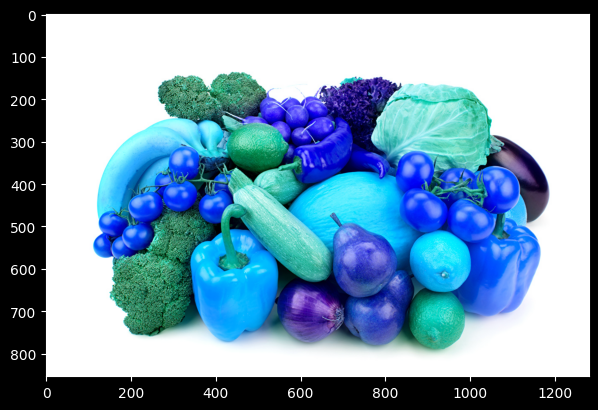

In [3]:
plt.figure(figsize=(7,7))
plt.imshow(img);

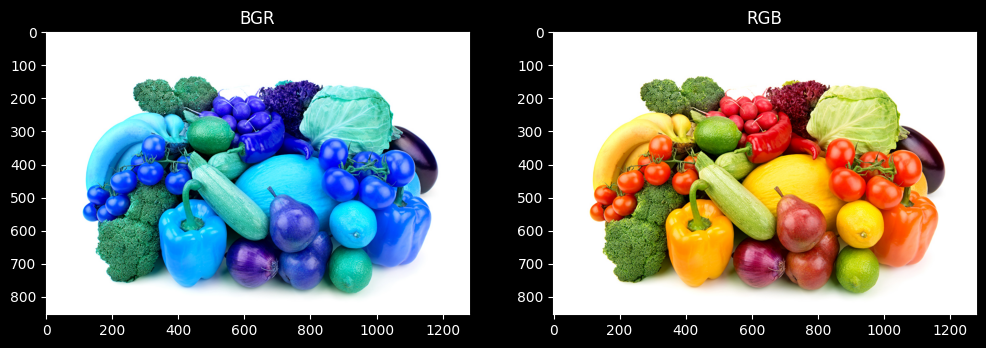

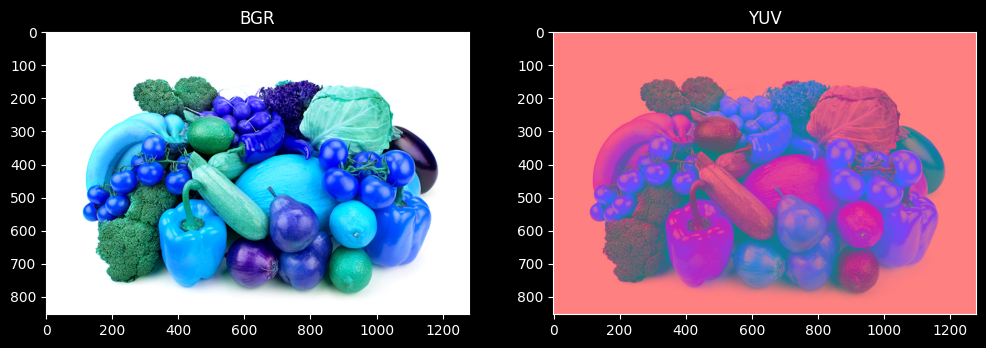

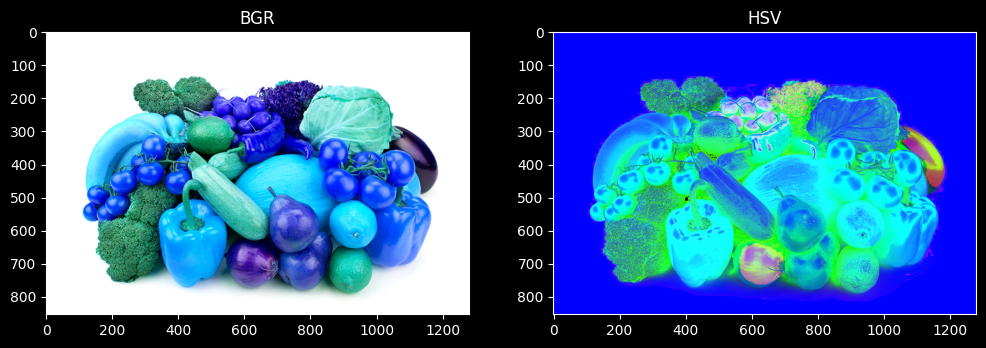

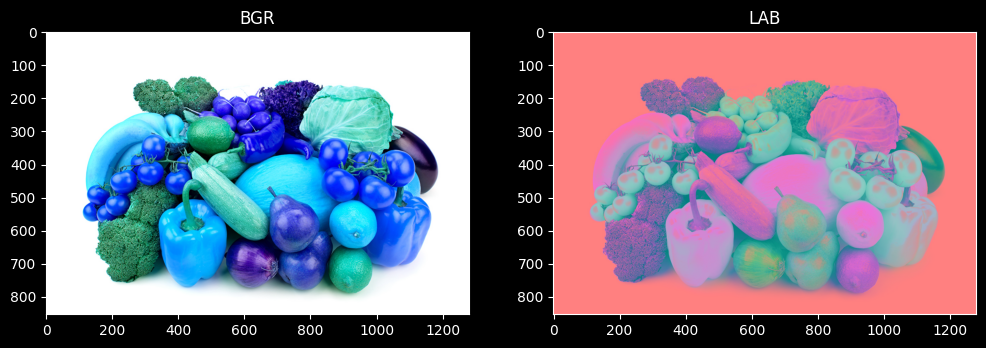

In [4]:
cv2.imwrite('file.png', img)

def show_imgs(i1,i2,title1,title2):
    "Отрисовка двух изображений 'как есть', в строчку"
    fig=plt.figure(figsize=(12,5))
    ax = fig.add_subplot(121)
    plt.gca().set_title(title1)
    plt.imshow(i1)
    ax = fig.add_subplot(122)
    plt.gca().set_title(title2)
    plt.imshow(i2)

# BGR в RGB
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
show_imgs(img,rgb_img,'BGR','RGB')

# BGR в YUV
yuv_img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
show_imgs(img,yuv_img,'BGR','YUV')

# BGR в HSV
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
show_imgs(img,hsv_img,'BGR','HSV')

# BGR в LAB
lab_img = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
show_imgs(img,lab_img,'BGR','LAB')

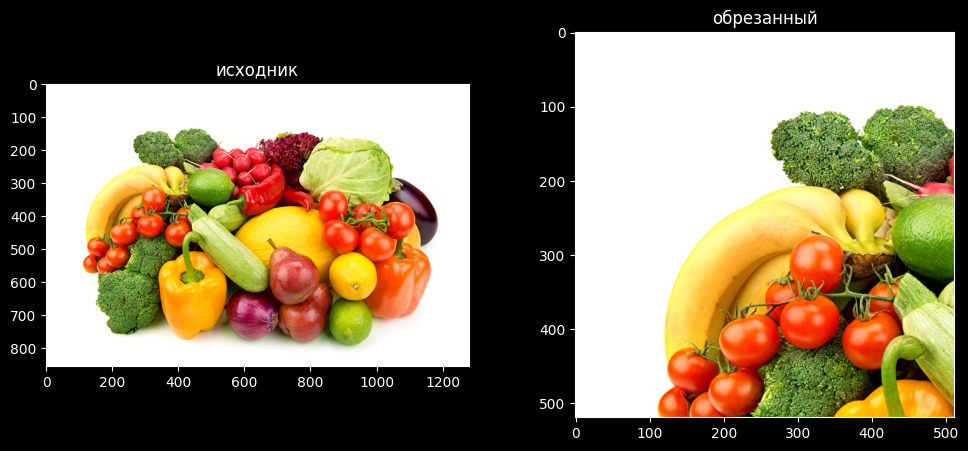

In [5]:
#@title Параметры обрезки { run: "auto" }
#@markdown ### Откуда по горизонтали
x = 0 #@param {type:"slider", min:0, max:512, step:2}
#@markdown ### Откуда по вертикали
y = 38 #@param {type:"slider", min:0, max:512, step:2}
#@markdown ### Сколько по горизонтали
w = 512 #@param {type:"slider", min:0, max:512, step:2}
#@markdown ### Сколько по вертикали
h = 520 #@param {type:"slider", min:0, max:521, step:2}

# важно: тут сначала вертикаль, потом горизонталь
img_crop = rgb_img[y:y+h,x:x+w,:]

show_imgs(rgb_img,img_crop,'исходник','обрезанный')

In [6]:
def show_imgs_jet(i1,i2,i3):
    fig=plt.figure(figsize=(25,10))
    ax = fig.add_subplot(131)
    plt.imshow(i1, cmap='jet')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax = fig.add_subplot(132)
    plt.imshow(i2, cmap='jet')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax = fig.add_subplot(133)
    plt.imshow(i3, cmap='jet')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

In [7]:
# image=img_crop
# бинаризация работает только в 1 канале так что берем только серую
img_gray = cv2.cvtColor(img_crop, cv2.COLOR_RGB2GRAY)
img_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 108, 103, 102],
       [255, 255, 255, ..., 124, 120, 117],
       [255, 255, 255, ..., 137, 133, 130]], dtype=uint8)

автоматически определенное оптимальное значение разделения
173.0


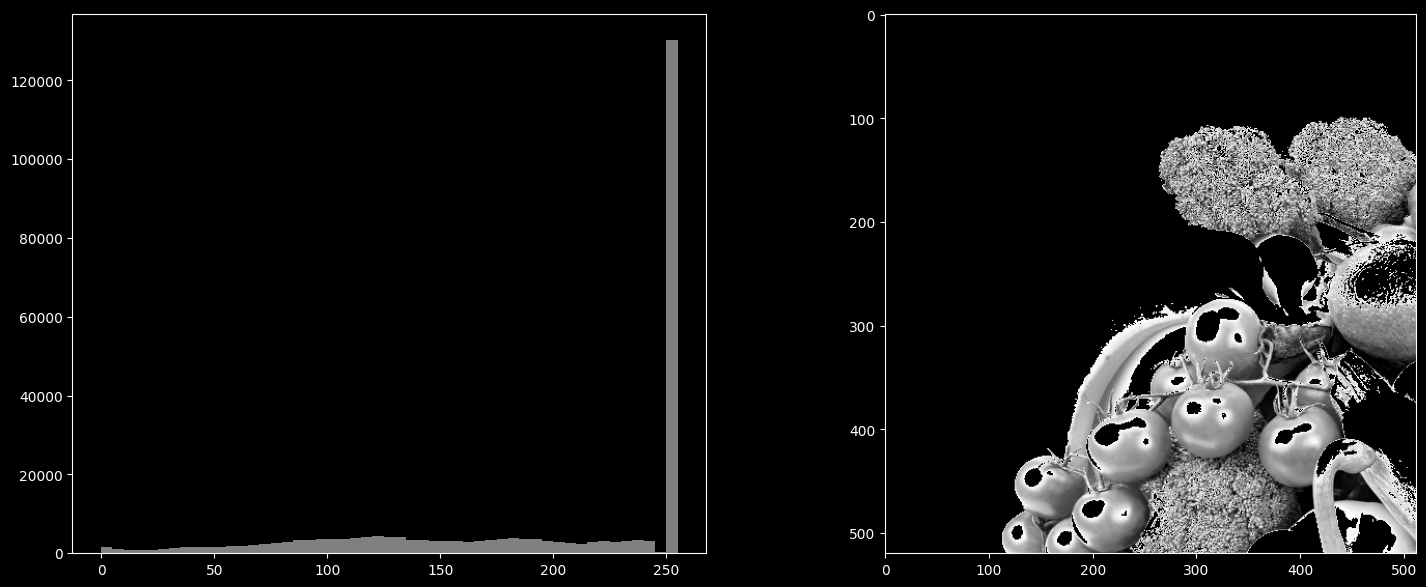

In [8]:
#@title Выбираем метод бинаризации{ run: "auto" }
method=cv2.THRESH_TOZERO_INV #@param [ "cv2.THRESH_BINARY" , "cv2.THRESH_BINARY_INV", "cv2.THRESH_TRUNC","cv2.THRESH_TOZERO","cv2.THRESH_TOZERO_INV" ]{type:"raw"}


image=img_gray

### метод Otsu
min_threshold = 0
max_threshold = 255
bins = 51      # количество разбиений
rg = (0,255)   # интересующий нас диапазон значений для разбиений
auto_detected_threshold,otsu_threshold = cv2.threshold(image,min_threshold,max_threshold,method+cv2.THRESH_OTSU)
# автоматически определенное оптимальное значение разделения
print('автоматически определенное оптимальное значение разделения')
print (auto_detected_threshold)


plt.figure(figsize=(18,7))
plt.subplot(121)
plt.hist(image.flatten(), bins, rg, color='gray')
plt.subplot(122)
plt.imshow(otsu_threshold,'gray');

In [9]:
###@title Меняем пороги{ run: "auto" }
treshhold_down = 24 #@param {type:"slider", min:0, max:255, step:2}
treshhold_up = 52 #@param {type:"slider", min:0, max:255, step:2}
kernel_size = 15 #@param {type:"slider", min:3, max:25, step:2}

increase = cv2.resize(img_gray, None,fx=3, fy=3, interpolation = cv2.INTER_CUBIC)

increase_rgb = cv2.resize(img_crop, None,fx=3, fy=3, interpolation = cv2.INTER_CUBIC)


img_blur = cv2.GaussianBlur(increase,(kernel_size,kernel_size),0)

edges_Canny = cv2.Canny(img_blur, treshhold_down, treshhold_up)

_,edges_otsu_threshold = cv2.threshold(edges_Canny,min_threshold,max_threshold,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

images = np.hstack((img_blur, edges_Canny, edges_otsu_threshold))

cv2.imshow('images', images)

In [10]:
#@title Выбираем Метрику Расстояния { run: "auto" }
distanceType = cv2.DIST_L2 #@param [  "cv2.DIST_C", "cv2.DIST_L1", "cv2.DIST_L2" ]{type:"raw"}
image = edges_otsu_threshold #@param [  "otsu_threshold", "edges_otsu_threshold" ]{type:"raw"}

Dist_Transform = cv2.distanceTransform(image, distanceType=distanceType, maskSize=0)

images = np.hstack((image,Dist_Transform))

cv2.imshow('images', images)

In [11]:
# Маска "фон"/ "не фон"
_, mask = cv2.threshold(increase,min_threshold,max_threshold,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
_, mask_bin = cv2.threshold(increase,min_threshold,max_threshold,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# Бинаризация результата Distance Transform
_, dist = cv2.threshold(Dist_Transform,0.01*255,255, cv2.THRESH_BINARY)

kernel = np.ones((4,4),np.uint8) # ядро
# "Прореживаем" результат умножения маски на бинаризацию Distance Transform
Dist_Transform_opening = cv2.morphologyEx(mask*dist, cv2.MORPH_OPEN, kernel)

images = np.hstack((mask,Dist_Transform,dist, mask*dist,Dist_Transform_opening))
# Итого визуализируем: Изображение и фон; Distance Transform; Бинаризацию Distance Transform
# умножение маски на бинаризацию Distance Transform и "почищенный" результат умножения
cv2.imshow("images", images)

In [12]:
# Делаем изображение в котором уже нашли фон
img_copy = np.copy(increase_rgb)
for c in range(3):
    img_copy[:,:,c]=img_copy[:,:,c]*(mask_bin/255).astype('uint8')
cv2_imshow(img_copy)

NameError: name 'cv2_imshow' is not defined

In [ ]:
# Связанные Компоненты. "0" - весь фон, остальные цифры - разные связные компоненты
ret, markers = cv2.connectedComponents(Dist_Transform_opening.astype('uint8'))
# Делаем так, что метка "фона" - 1
markers = markers+1
# Делаем так, чтобы "неизвестные" регионы были равны "0"
_, mask = cv2.threshold(increase,min_threshold,max_threshold,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
unknown=cv2.subtract(mask,Dist_Transform_opening.astype('uint8'))
markers_unknown=np.copy(markers)
markers_unknown[unknown==255] = 0
markers_=np.copy(markers_unknown)
#Ищем не в исходном изображении, а там, где уже есть фон
image_for_seg = img_copy
markers_ = cv2.watershed(image_for_seg, markers_)
# Итого визуализируем: исходные связанные компоненты;
# Связанные компоненты с разделением на фон и неизвестное;
# Найденные сегменты
show_imgs_jet(markers,markers_unknown,markers_)